<a href="https://colab.research.google.com/github/Kaiziferr/deep_learning_workshop/blob/master/RNN/01_workshop_LSTM_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# **Data**
---
Este es un problema en el que, dado un año y un mes, la tareas es predecir el número de pasajeros de aerolineas internecionales en unidades de 1.000. Los datos van desde enero de 1949 hasta diciembre de 1960 o 12 años, con 144 observaciones.


In [2]:
url = 'https://raw.githubusercontent.com/jinfagang/LSTM_learn/master/international-airline-passengers.csv'
data = pd.read_csv(url, usecols=[1], engine="python")
data_values = data.values.astype('float32')

#**Normalización**
---

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_values = scaler.fit_transform(data_values)

# **Data Split**
---



In [4]:
train_size = int(len(data_values)*0.67)
test_size = len(data_values) - train_size
train, test = data_values[:train_size,:], data_values[train_size:, :]

# **Create Data**
---



In [5]:
def create_dataset(data, loock_back = 1):
  dataX, dataY = [], []
  for i in range(len(data)-loock_back-1): 
    item_x = data[i: (i+loock_back), 0]
    item_y = data[i+loock_back,0]
    dataX.append(item_x)
    dataY.append(item_y)
  return np.array(dataX), np.array(dataY)

In [6]:
loock_back = 1
trainX, trainY = create_dataset(train, loock_back)
testX, testY = create_dataset(test, loock_back)

La red LSTM espera que los datos de entrada (X) se proporcionen con una estructura de matriz especifica en forma de [muestras, pasos de tiempo (ventana), caracteristicas]<br><br>
Los datos preparados tienen la forma: [muestras, carcteristicas]<br><br>

In [9]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# **Diseño de LSTM**
---
- Capa visible con 1 entrada
- Capa oculta con 4 bloques LSTM o neuronas
- Capa de salida que hace una predicción de valor unico. LSTM utiliza por defecto la función sigmoidal
- 100 epocas y batch


In [11]:
model = Sequential()
model.add(LSTM(4, input_shape = (1, loock_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs = 100, batch_size = 1, verbose = 0)

# **Predicción**
---



In [13]:
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

# **Resultados**
---



In [14]:
train_inverse_predict_X = scaler.inverse_transform(train_predict)
train_inverse_y = scaler.inverse_transform([trainY])

test_inverse_predic_X = scaler.inverse_transform(test_predict)
test_inverse_y = scaler.inverse_transform([testY])

# **Calcular el error**
---


In [15]:
train_score = math.sqrt(mean_squared_error(train_inverse_y[0], train_inverse_predict_X[:,0]))
print('Puntuación Entrenamiento: %.2f RMSE' % (train_score))
test_score = math.sqrt(mean_squared_error(test_inverse_y[0], test_inverse_predic_X[:,0]))
print('Puntuación Test: %.2f RMSE' % (test_score))

Puntuación Entrenamiento: 22.68 RMSE
Puntuación Test: 50.32 RMSE


# Plot

In [16]:
train_predict_plot = np.empty_like(data_values)
train_predict_plot[:,:] = np.nan
train_predict_plot[loock_back: len(train_inverse_predict_X)+loock_back, :] = train_inverse_predict_X

test_predict_plot = np.empty_like(data_values)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_inverse_predict_X)+(loock_back*2)+1:len(data_values)-1,:] = test_inverse_predic_X

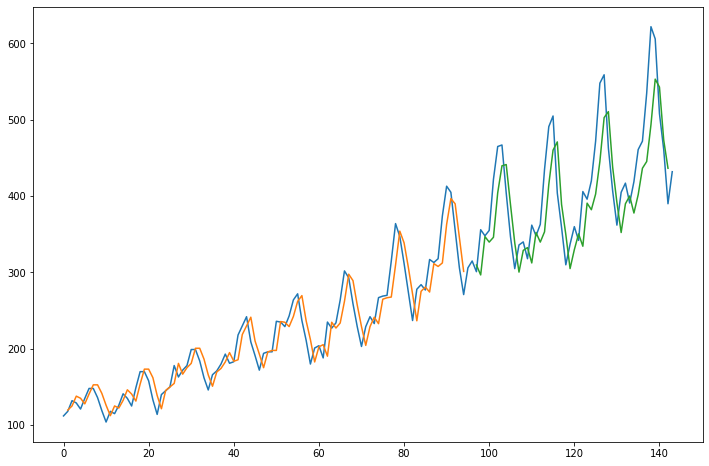

In [17]:
plt.figure(figsize=(12,8))
plt.plot(scaler.inverse_transform(data_values))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)